# Dimensionality Reduction

When working with neuroscientific data, an essential first step before modeling or analysis is **preprocessing**. This includes preparing the data in a way that allows us to extract meaningful patterns while reducing noise and complexity.

One major aspect of preprocessing is **dimensionality reduction**. Neural data is often high-dimensional and complex. Dimensionality reduction techniques help simplify this data by projecting it into a lower-dimensional space, making it easier to visualize, analyze, and interpret.

There are many techniques available, each with different assumptions and use cases. Choosing the right one depends on your **research question**, your **objectives**, and the **nature of your data**.

In this tutorial, we will introduce a few widely used dimensionality reduction methods. These include both linear and non-linear approaches:

### Techniques we will cover

**Linear method:**
- Principal Component Analysis (PCA)

**Non-linear methods:**
- t-SNE (t-distributed Stochastic Neighbor Embedding)
- UMAP (Uniform Manifold Approximation and Projection)

**Non-linear, learning-based method:**
- Variational Autoencoders (VAEs)

### What you will learn

- The basics of Principal Component Analysis (PCA)
- How to apply PCA for dimensionality reduction
- How to reduce dimensionality using t-SNE and UMAP
- How to implement a simple Variational Autoencoder (VAE)
- How to apply these techniques to real neural data recorded from the prefrontal cortex of a monkey during a working memory task
- How to decode the memorized cue from the monkey's brain activity using reduced data

A short presentation will give you an overview of the topic. If you're interested in diving deeper, explore the following resources:

### Further resources

**Detailed tutorial**  
Neuromatch Academy:  
[https://compneuro.neuromatch.io/tutorials/W1D4_DimensionalityReduction/student/W1D4_Intro.html](https://compneuro.neuromatch.io/tutorials/W1D4_DimensionalityReduction/student/W1D4_Intro.html)

**Mathematical foundations of PCA**  
Covariance matrices and eigenvalues (YouTube):  
[https://youtube.com/watch?v=-f6T9--oM0E](https://youtube.com/watch?v=-f6T9--oM0E)

**Intuition for PCA**  
[https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c)

**Intuition for t-SNE**  
[https://towardsdatascience.com/t-sne-machine-learning-algorithm-a-great-tool-for-dimensionality-reduction-in-python-ec01552f1a1e](https://towardsdatascience.com/t-sne-machine-learning-algorithm-a-great-tool-for-dimensionality-reduction-in-python-ec01552f1a1e)

**UMAP overview**  
[https://towardsdatascience.com/umap-dimensionality-reduction-an-incredibly-robust-machine-learning-algorithm-b5acb01de568](https://towardsdatascience.com/umap-dimensionality-reduction-an-incredibly-robust-machine-learning-algorithm-b5acb01de568)

**Understanding VAEs**  
[https://towardsdatascience.com/variational-bayes-4abdd9eb5c12](https://towardsdatascience.com/variational-bayes-4abdd9eb5c12)


# Dataset - Simple CV Problem we will start with

The data set contains ten-class of 28x28 pixel images, which are actually 784 features for each image. Can we really reduce these dimensions to two- or three-dimension and separate each class based on these dimensions only? Let us explore different techniques below.
In this example, we’ll apply PCA to the MNIST dataset, a classic computer vision dataset consisting of grayscale images of hand-drawn digits from 0 through 9.

Each image in MNIST is 28 pixels high and 28 pixels wide, resulting in a total of 784 pixels per image. Each pixel is represented by an integer value between 0 and 255, where higher values correspond to darker pixels:

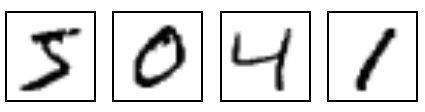

Due to the large number of data points and the high dimensionality of the images, along with the potential presence of noise unrelated to the essential structure of the digits, reducing the number of parameters becomes a sensible first step. 

We will explore several dimensionality reduction techniques on the MNIST dataset and evaluate their respective effects on the data, starting with PCA. This will help us understand the effect of different dimensionality reduction techniques on the data.




## Principal Component Analysis (PCA)

We begin with one of the most commonly used dimensionality reduction techniques: Principal Component Analysis (PCA). PCA is a linear method that finds the directions (principal components) along which the variance of the data is maximized.

PCA is useful because it simplifies the data by projecting it onto a smaller number of dimensions while preserving as much variance as possible. This often makes it easier to visualize, analyze, and interpret complex neural data.


PCA is a linear transformation algorithm by using the correlation between some dimensions and triese to provide a minimum number of variables that keeps the maximum amount of variation or information about how the original data. There are several steps to do before PCA:


1. Standardation:
We want the range of the continuous variables to contribute equally to the analysis. PCA is sensitive to the variance of each variable - if some features have much larger ranges than others, they can dominate the principal components and bias the results. Standardizing the data (e.g., zero mean and unit variance) ensures that all features are on the same scale.

MNIST dataset loaded with shape: (70000, 784)


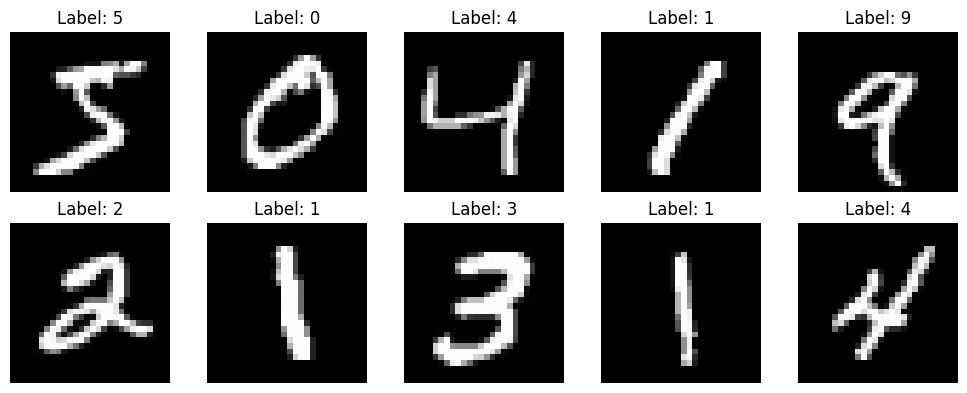

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

#load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target'].astype(int)
print("MNIST dataset loaded with shape:", X.shape)

#visualize some samples from the dataset
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f'Label: {y[i]}')
plt.tight_layout()
plt.show()


## PCA – Going Manually Through the Steps

Recall that the data consists of 28×28 pixel images, meaning that each image lives in a 784-dimensional space. To gain some intuition about the structure and relationships between these data points, we can use PCA to project them into a lower-dimensional space, say, two dimensions.

We can either use a built-in function in `scikit-learn` that performs all the steps for us, or go through the key steps manually to better understand what PCA is doing under the hood:

1. **Standardize the data**  
   Ensure that each feature (pixel) has zero mean and unit variance.

2. **Construct the covariance matrix**  
   Compute the covariance matrix of the standardized data to capture the relationships between features.

3. **Compute the eigenvalues and eigenvectors**  
   These reveal the directions (principal components) in which the data varies the most, and how much variance each component explains.

4. **Sort and select top components**  
   Sort the eigenvectors by their corresponding eigenvalues in descending order. Select the top *k* eigenvectors to retain the desired amount of variance.

5. **Project the data**  
   Multiply the original (standardized) data by the selected eigenvectors to obtain the reduced-dimensional representation.


Covariance matrix shape: (784, 784)


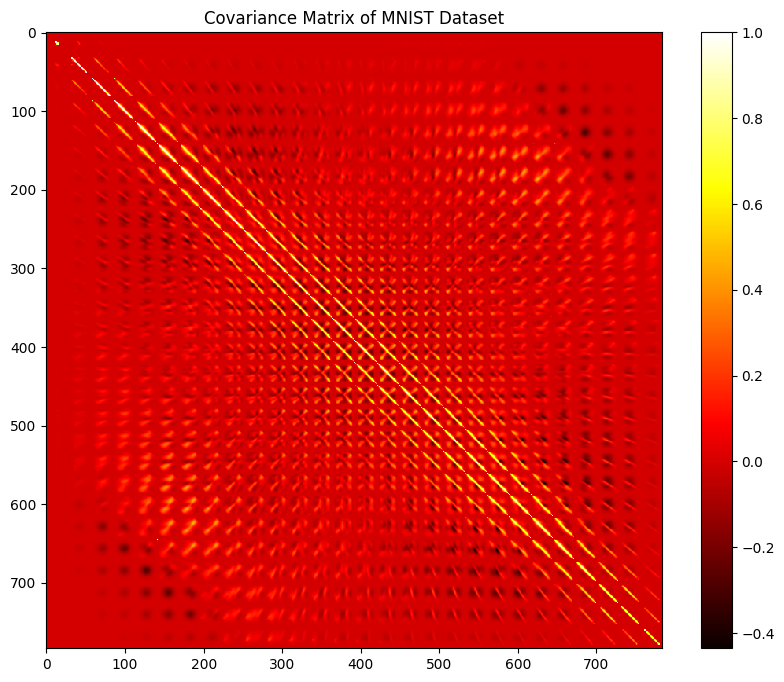

In [ ]:
#1:Standardize the data
X_scaled = StandardScaler().fit_transform(X) # standard scaler essentially centers the data to a zero mean and scales it to unit variance. why do we do this?

#2: onstruct the covariance matrix
cov_matrix = np.cov(X_scaled, rowvar=False) # TO DO - hint use a numpy function to compute the covariance matrix
print("Covariance matrix shape:", cov_matrix.shape)

#plot the covariance matrix
plt.figure(figsize=(10, 8))
plt.imshow(cov_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Covariance Matrix of MNIST Dataset')
plt.show()

What does the plot of the covarience matrix show? Explain! What do the colours represent and why do you see the specific patterns? 

Remember: the features here represent different pixels in the handwritten digit images, and the covariance is a measure of how much two values (pixels) change together.

Feel free to ask TAs if you are unsure about the linear algebra behind this!

Eigenvalues shape: (784,)
Sorted eigenvalues shape: (784,)
Top eigenvectors shape: (784, 2)


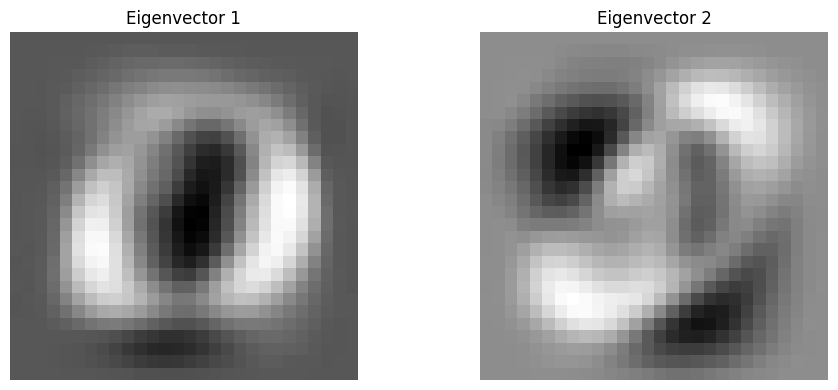

In [ ]:
#3:compute the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
print("Eigenvalues shape:", eigenvalues.shape)
#4:sort the eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
print("Sorted eigenvalues shape:", eigenvalues.shape)


k = 2  #change this value to see more or fewer eigenvectors
top_eigenvectors = eigenvectors[:, :k]
print("Top eigenvectors shape:", top_eigenvectors.shape)

#plot the top eigenvectors
plt.figure(figsize=(10, 4))
for i in range(k):
    plt.subplot(1, k, i + 1)
    plt.imshow(top_eigenvectors[:, i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f'Eigenvector {i + 1}')
plt.tight_layout()
plt.show()


Projected data shape: (70000, 2)


/tmp/ipykernel_1072849/1900206921.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('tab10', 10))


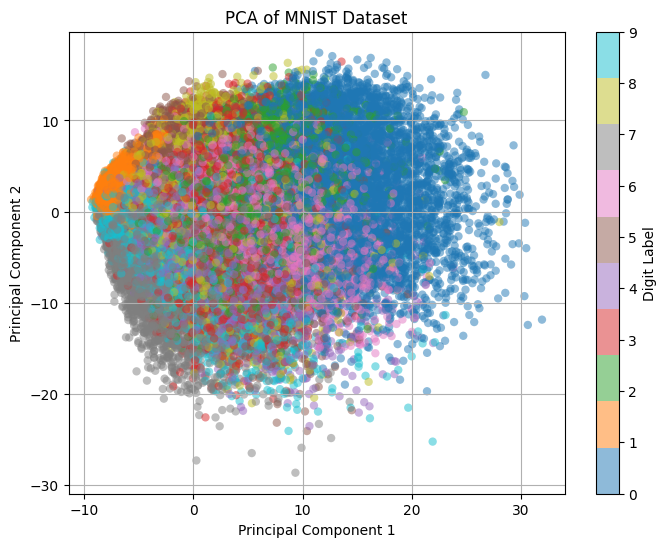

In [ ]:
#5:Project the data onto the new feature space
X_pca = X_scaled.dot(top_eigenvectors)
print("Projected data shape:", X_pca.shape)


plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 10))
plt.colorbar(label='Digit Label')
plt.title('PCA of MNIST Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

## Applying PCA using sklearn
We will reduce the data dimensionality by projecting it onto the first two principal components. This will allow us to visualize the trials in a two-dimensional space.

/tmp/ipykernel_1072849/3381230390.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap('tab10', 10))  # 'spectral' is deprecated


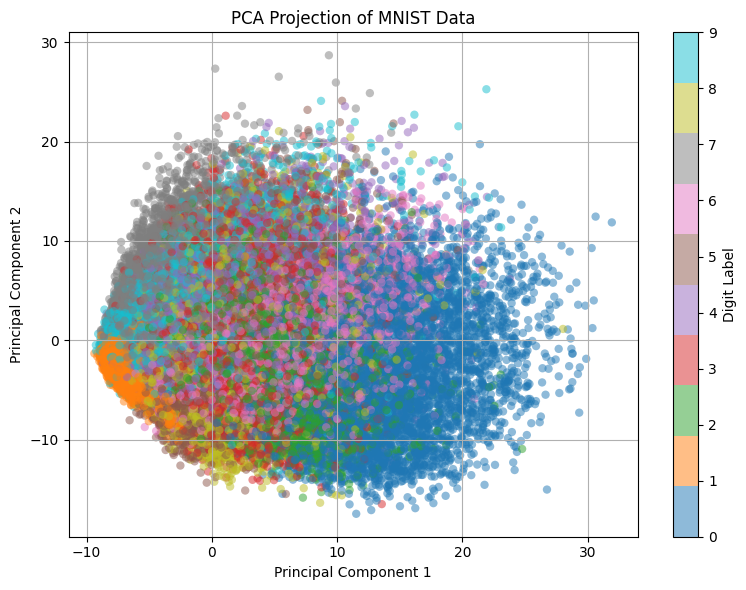

In [8]:
projected = PCA(n_components=2).fit_transform(X_scaled)#apply PCA using scikit-learn – this single line does all PCA steps in one!


import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(projected[:, 0], projected[:, 1],
            c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('tab10', 10))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection of MNIST Data')
plt.colorbar(label='Digit Label')
plt.grid(True)
plt.tight_layout()
plt.show()

## Exercise: Change the *k* Value and Explore Its Effect on PCA

Choosing a fitting number of principal components (*k*) is especially important when working with neuroscience data or any complex dataset. It’s crucial to align this choice with your research goals.

To get an intuition for how *k* affects PCA, explore its effect on the following:
Go back to your steps of PCA before and try different k-values.

1. How does the shape of the top eigenvectors change as you vary *k*?  
2. How much variance do the selected components explain?  
   **TO DO:** Plot the relationship between *k* and the cumulative explained variance to help choose a meaningful value for *k*.  HINT - you cxan calculate the varience ratio
3. How does the projection of the data look in the reduced space?  
4. What patterns do you notice in the eigenvector images as *k* increases or decreases?

Try different values like 1, 5,10,50,... and reflect on how dimensionality reduction quality and interpretability change.


### HINT - try plotting these to support your exploration:

- Visualize the top *k* eigenvectors as images to see their spatial patterns.  
- Plot the cumulative explained variance against *k* to find where additional components add diminishing returns.  
- Plot the 2D PCA projection (using the first two components) to see how well data clusters separate as *k* changes.



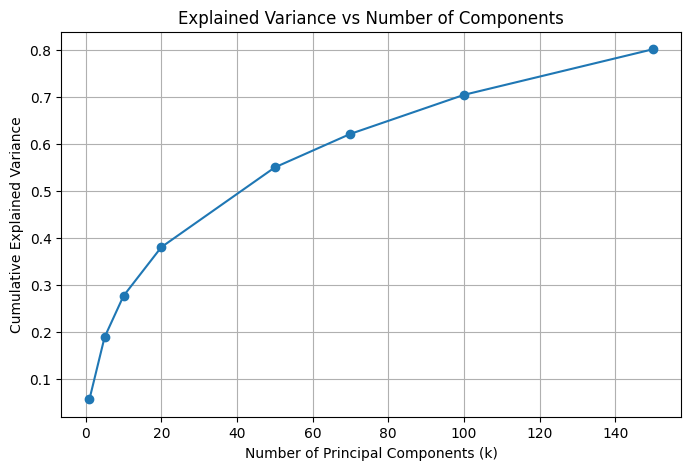

In [12]:
import numpy as np
import matplotlib.pyplot as plt

k_values = [1, 5, 10, 20, 50,70,100,150]
explained_variances = []

for k in k_values:
    top_eigenvectors = eigenvectors[:, :k]
    #explained variance ratio
    ev_ratio = eigenvalues[:k] / np.sum(eigenvalues)
    explained_variances.append(np.sum(ev_ratio))
    
    X_pca = X_scaled.dot(top_eigenvectors)
    '''
    
    if k <= 10:
        plt.figure(figsize=(12, 3))
        for i in range(k):
            plt.subplot(1, k, i+1)
            plt.imshow(top_eigenvectors[:, i].reshape(28, 28), cmap='gray')
            plt.title(f'PC {i+1}')
            plt.axis('off')
        plt.suptitle(f'Top {k} Eigenvectors')
        plt.show()
    
    if k >= 2:
        plt.figure(figsize=(8, 6))
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', alpha=0.5)
        plt.xlabel('PC 1')
        plt.ylabel('PC 2')
        plt.title(f'PCA Projection with k={k}')
        plt.colorbar(label='Digit Label')
        plt.show()
        '''

plt.figure(figsize=(8, 5))
plt.plot(k_values, explained_variances, marker='o')
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs Number of Components')
plt.grid(True)
plt.show()



What does this plot show? Try playing around witrh the number of components. What does it do, why?

# t-sne -> non-linear Dimentionality Reduction



# UMAP

# Variational Autoencoders (VAEs)